<a href="https://colab.research.google.com/github/Divijaaaa/new1/blob/main/Hybrid_model_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Sample email dataset (replace with your actual dataset)
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',
        # Add more emails here...
    ],
    'label': [1, 0, 1]  # 1 for phishing (spam), 0 for legitimate (ham)
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df['email_text'])

# Initialize the classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Fit the classifiers on the entire dataset
lr_classifier.fit(X_train_tfidf, df['label'])
rf_classifier.fit(X_train_tfidf, df['label'])
gb_classifier.fit(X_train_tfidf, df['label'])
svm_classifier.fit(X_train_tfidf, df['label'])

# Function to predict whether an email text is "ham" (0) or "spam" (1)
def predict_email_category(email_text):
    # Transform the input text using the same TF-IDF vectorizer
    email_tfidf = tfidf_vectorizer.transform([email_text])

    # Make predictions using each classifier
    lr_prediction = lr_classifier.predict(email_tfidf)
    rf_prediction = rf_classifier.predict(email_tfidf)
    gb_prediction = gb_classifier.predict(email_tfidf)
    svm_prediction = svm_classifier.predict(email_tfidf)

    # Combine the predictions using a simple majority voting mechanism
    ensemble_prediction = (lr_prediction + rf_prediction + gb_prediction + svm_prediction) >= 2

    # Return the prediction as "ham" or "spam"
    return "spam" if ensemble_prediction[0] == 1 else "ham"

# Example usage:
sample_email_text = "Congratulations! You have won a $1000 gift card. Click to claim your prize!"
prediction = predict_email_category(sample_email_text)
print(f"Predicted Category: {prediction}")


Predicted Category: spam


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Sample email dataset
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',

    ],
    'label': [1, 0, 1]  # 1 for spam, 0 for ham
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['label'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Fit the classifiers on the training data
lr_classifier.fit(X_train_tfidf, y_train)
rf_classifier.fit(X_train_tfidf, y_train)
gb_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions using each classifier
lr_predictions = lr_classifier.predict(X_test_tfidf)
rf_predictions = rf_classifier.predict(X_test_tfidf)
gb_predictions = gb_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Combine the predictions using a simple majority voting mechanism
ensemble_predictions = (lr_predictions + rf_predictions + gb_predictions + svm_predictions) >= 2

# Evaluate the ensemble's accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

# Function to predict whether an email text is "ham" or "spam"
def predict_email_category(email_text):
    email_tfidf = tfidf_vectorizer.transform([email_text])

    # Make predictions using each classifier
    lr_prediction = lr_classifier.predict(email_tfidf)
    rf_prediction = rf_classifier.predict(email_tfidf)
    gb_prediction = gb_classifier.predict(email_tfidf)
    svm_prediction = svm_classifier.predict(email_tfidf)

    # Combine the predictions using a simple majority voting mechanism
    ensemble_prediction = (lr_prediction + rf_prediction + gb_prediction + svm_prediction) >= 2

    # Return the prediction as "ham" or "spam"
    return "spam" if ensemble_prediction[0] == 1 else "ham"

# Example usage:
sample_email_text = "Congratulations! You have won a $1000 gift card. Click to claim your prize!"
prediction = predict_email_category(sample_email_text)
print(f"Predicted Category: {prediction}")


Ensemble Model Accuracy: 1.0
Predicted Category: spam


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Check if NLTK vader_lexicon is downloaded, if not, download it
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import re
from urllib.parse import urlparse

# Sample email dataset (replace with your actual dataset)
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',
        # Add more emails here...
    ],
    'label': [1, 0, 1]  # 1 for spam, 0 for ham
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['label'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Fit the classifiers on the training data
lr_classifier.fit(X_train_tfidf, y_train)
rf_classifier.fit(X_train_tfidf, y_train)
gb_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions using each classifier
lr_predictions = lr_classifier.predict(X_test_tfidf)
rf_predictions = rf_classifier.predict(X_test_tfidf)
gb_predictions = gb_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Combine the predictions using a simple majority voting mechanism
ensemble_predictions = (lr_predictions + rf_predictions + gb_predictions + svm_predictions) >= 2

# Evaluate the ensemble's accuracy
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

# Function to predict whether an email text is "ham" or "spam" and calculate risk
def predict_email_category(email_text):
    email_tfidf = tfidf_vectorizer.transform([email_text])

    # Make predictions using each classifier
    lr_prediction = lr_classifier.predict(email_tfidf)
    rf_prediction = rf_classifier.predict(email_tfidf)
    gb_prediction = gb_classifier.predict(email_tfidf)
    svm_prediction = svm_classifier.predict(email_tfidf)

    # Combine the predictions using a simple majority voting mechanism
    ensemble_prediction = (lr_prediction + rf_prediction + gb_prediction + svm_prediction) >= 2

    # Risk factor analysis
    risk_score = calculate_risk(email_text)

    # Return the prediction as "ham" or "spam" and the numerical risk score
    return "spam" if ensemble_prediction[0] == 1 else "ham", risk_score

# Function to calculate risk based on various factors (customize as needed)
def calculate_risk(email_text):
    # Example risk calculation (customize based on your factors)
    risk = 0

    # Sentiment analysis (negative sentiment increases risk)
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(email_text)['compound']
    risk += sentiment_score

    # URL count (more URLs may increase risk)
    url_count = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_text))
    risk += url_count

    # Domain analysis (phishing-like domains may increase risk)
    domains = re.findall(r'(?P<url>https?://[^\s]+)', email_text)
    for domain in domains:
        parsed_domain = urlparse(domain)
        if 'phish' in parsed_domain.netloc or 'malicious' in parsed_domain.netloc:
            risk += 1.0

    return risk

# Example usage:
sample_email_text = "Congratulations! You have won a $1000 gift card. Click to claim your prize!"
category, risk = predict_email_category(sample_email_text)
print(f"Predicted Category: {category}")
print(f"Risk Score: {risk}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Ensemble Model Accuracy: 1.0
Predicted Category: spam
Risk Score: 0.937


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from urllib.parse import urlparse
import time

# Sample email dataset (replace with your actual dataset)
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',
        # Add more emails here...
    ],
    'label': [1, 0, 1]  # 1 for spam, 0 for ham
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['label'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Fit the classifiers on the training data
lr_classifier.fit(X_train_tfidf, y_train)
rf_classifier.fit(X_train_tfidf, y_train)
gb_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)

# Start timing
start_time = time.time()

# Make predictions using each classifier
lr_predictions = lr_classifier.predict(X_test_tfidf)
rf_predictions = rf_classifier.predict(X_test_tfidf)
gb_predictions = gb_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Combine the predictions using a simple majority voting mechanism
ensemble_predictions = (lr_predictions + rf_predictions + gb_predictions + svm_predictions) >= 2

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions)
recall = recall_score(y_test, ensemble_predictions)
f1 = f1_score(y_test, ensemble_predictions)

# Calculate elapsed time
elapsed_time = time.time() - start_time

# Print evaluation metrics
print("Machine Learning Phishing Detection Project Outline")
print("--------------------------------------------------")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Time taken for predictions: {elapsed_time} seconds')

# Function to predict whether an email text is "ham" or "spam" and calculate risk as a percentage
def predict_email_category(email_text):
    email_tfidf = tfidf_vectorizer.transform([email_text])

    # Make predictions using each classifier
    lr_prediction = lr_classifier.predict(email_tfidf)
    rf_prediction = rf_classifier.predict(email_tfidf)
    gb_prediction = gb_classifier.predict(email_tfidf)
    svm_prediction = svm_classifier.predict(email_tfidf)

    # Combine the predictions using a simple majority voting mechanism
    ensemble_prediction = (lr_prediction + rf_prediction + gb_prediction + svm_prediction) >= 2

    # Calculate risk as a percentage
    risk_percentage = calculate_risk(email_text)

    # Return the prediction as "ham" or "spam" and the risk percentage
    return "spam" if ensemble_prediction[0] == 1 else "ham", risk_percentage

# Function to calculate risk as a percentage based on various factors (customize as needed)
def calculate_risk(email_text):
    # Example risk calculation (customize based on your factors)
    risk = 0

    # Sentiment analysis (negative sentiment increases risk)
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(email_text)['compound']
    risk += (sentiment_score + 1) * 50  # Scales sentiment score to 0-100 range

    # URL count (more URLs may increase risk)
    url_count = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_text))
    risk += (url_count / 5) * 20  # Assuming a maximum of 5 URLs

    # Domain analysis (phishing-like domains may increase risk)
    domains = re.findall(r'(?P<url>https?://[^\s]+)', email_text)
    for domain in domains:
        parsed_domain = urlparse(domain)
        if 'phish' in parsed_domain.netloc or 'malicious' in parsed_domain.netloc:
            risk += 20.0  # Fixed value for malicious domains

    # Ensure risk is within the 0-100% range
    risk = max(0, min(100, risk))

    return risk

# Example usage:
sample_email_text = "Congratulations! You have won a $1000 gift card. Click to claim your prize!"
category, risk = predict_email_category(sample_email_text)
print("\nSample Email Prediction and Risk Assessment")
print("--------------------------------------------")
print(f"Predicted Category: {category}")
print(f"Risk Percentage: {risk}%")



Machine Learning Phishing Detection Project Outline
--------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Time taken for predictions: 0.0214993953704834 seconds

Sample Email Prediction and Risk Assessment
--------------------------------------------
Predicted Category: spam
Risk Percentage: 96.85000000000001%


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


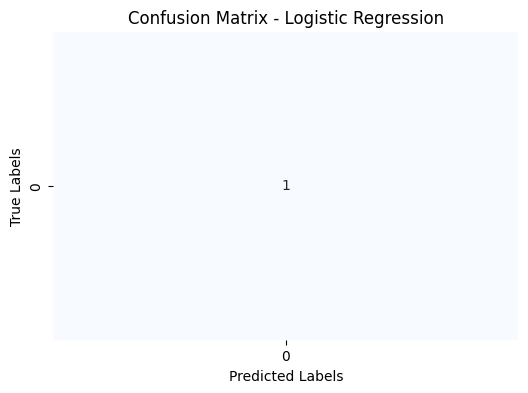

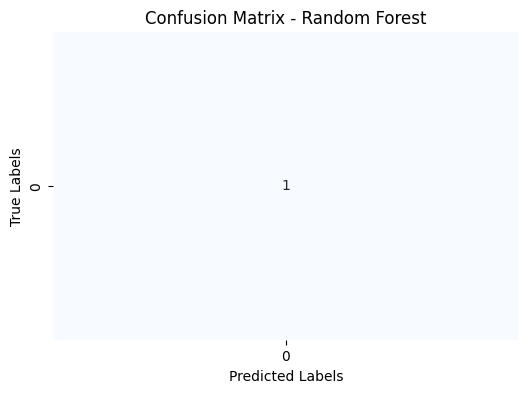

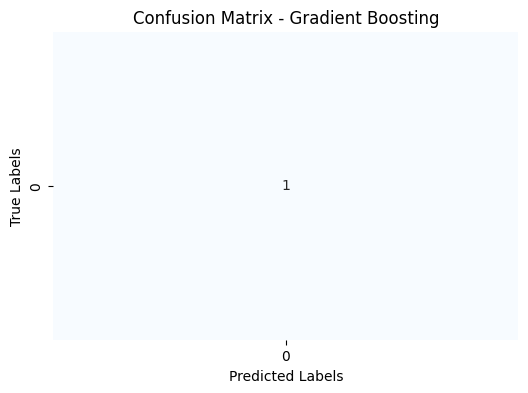

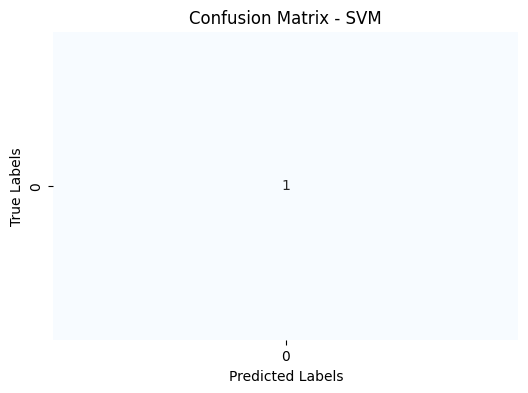

Machine Learning Phishing Detection Project Outline
--------------------------------------------------
Logistic Regression Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Random Forest Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Gradient Boosting Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


SVM Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



Sample Email Prediction and Risk Assessment
--------------------------------------------
Predicted Category: spam
Risk Percentage: 96.85000000000001%
sentimental risk analysis: 96.85000000000001%
Time taken for predictions: 0.025569915771484375 seconds


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from urllib.parse import urlparse
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Download the NLTK resource
import nltk
nltk.download('vader_lexicon')

# Sample email dataset ( actual dataset)
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',
        # Add more emails here...
    ],
    'label': [1, 0, 1]  # 1 for spam, 0 for ham
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['label'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize the classifiers
lr_classifier = LogisticRegression()
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC()

# Initialize dictionaries to store classifier results
classifier_results = {}

# Train and evaluate Logistic Regression classifier
lr_classifier.fit(X_train_tfidf, y_train)
lr_predictions = lr_classifier.predict(X_test_tfidf)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
classifier_results['Logistic Regression'] = {
    'Confusion Matrix': lr_confusion_matrix,
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1 Score': lr_f1
}

# Train and evaluate Random Forest classifier
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
classifier_results['Random Forest'] = {
    'Confusion Matrix': rf_confusion_matrix,
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1
}

# Train and evaluate Gradient Boosting classifier
gb_classifier.fit(X_train_tfidf, y_train)
gb_predictions = gb_classifier.predict(X_test_tfidf)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)
classifier_results['Gradient Boosting'] = {
    'Confusion Matrix': gb_confusion_matrix,
    'Accuracy': gb_accuracy,
    'Precision': gb_precision,
    'Recall': gb_recall,
    'F1 Score': gb_f1
}

# Train and evaluate SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
classifier_results['SVM'] = {
    'Confusion Matrix': svm_confusion_matrix,
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F1 Score': svm_f1
}

# Plot confusion matrices
for classifier_name, results in classifier_results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(results['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {classifier_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Print evaluation metrics for each classifier
print("Machine Learning Phishing Detection Project Outline")
print("--------------------------------------------------")
for classifier_name, results in classifier_results.items():
    print(f'{classifier_name} Classifier:')
    print(f'Accuracy: {results["Accuracy"]}')
    print(f'Precision: {results["Precision"]}')
    print(f'Recall: {results["Recall"]}')
    print(f'F1 Score: {results["F1 Score"]}')
    print("\n")

# Start timing
start_time = time.time()

# Function to predict whether an email text is "ham" or "spam" and calculate risk as a percentage
def predict_email_category(email_text):
    email_tfidf = tfidf_vectorizer.transform([email_text])

    # Make predictions using each classifier
    lr_prediction = lr_classifier.predict(email_tfidf)
    rf_prediction = rf_classifier.predict(email_tfidf)
    gb_prediction = gb_classifier.predict(email_tfidf)
    svm_prediction = svm_classifier.predict(email_tfidf)

    # Combine the predictions using a simple majority voting mechanism
    ensemble_prediction = (lr_prediction + rf_prediction + gb_prediction + svm_prediction) >= 2

    # Calculate risk as a percentage
    risk_percentage = calculate_risk(email_text)

    # Return the prediction as "ham" or "spam" and the risk percentage
    return "spam" if ensemble_prediction[0] == 1 else "ham", risk_percentage

# Function to calculate risk as a percentage based on various factors (customize as needed)
def calculate_risk(email_text):
    # Example risk calculation (customize based on your factors)
    risk = 0

    # Sentiment analysis (negative sentiment increases risk)
    sia = SentimentIntensityAnalyzer()
    sentiment_score = sia.polarity_scores(email_text)['compound']
    risk += (sentiment_score + 1) * 50  # Scales sentiment score to 0-100 range

    # URL count (more URLs may increase risk)
    url_count = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_text))
    risk += (url_count / 5) * 20  # Assuming a maximum of 5 URLs

    # Domain analysis (phishing-like domains may increase risk)
    domains = re.findall(r'(?P<url>https?://[^\s]+)', email_text)
    for domain in domains:
        parsed_domain = urlparse(domain)
        if 'phish' in parsed_domain.netloc or 'malicious' in parsed_domain.netloc:
            risk += 20.0  # Fixed value for malicious domains

    # Ensure risk is within the 0-100% range
    risk = max(0, min(100, risk))

    return risk

# Example usage:
sample_email_text = "Congratulations! You have won a $1000 gift card. Click to claim your prize!"
category, risk = predict_email_category(sample_email_text)
print("\nSample Email Prediction and Risk Assessment")
print("--------------------------------------------")
print(f"Predicted Category: {category}")
print(f"Risk Percentage: {risk}%")
print(f"sentimental risk analysis: {risk}%")

# Calculate elapsed time
elapsed_time = time.time() - start_time
print(f'Time taken for predictions: {elapsed_time} seconds')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from urllib.parse import urlparse
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Download the NLTK resource
import nltk
nltk.download('vader_lexicon')

# Sample email dataset (actual dataset)
data = {
    'email_text': [
        'Dear customer, your account has been compromised. Click here to reset your password.',
        'Hi, I hope you are doing well. Let\'s catch up soon!',
        'Congratulations! You have won a $1000 gift card. Click to claim your prize!',
        'This is a legitimate email from your bank.',
        'Important information about your account.',
        'You have a new friend request on social media.',
        # Add more emails here...
    ],
    'label': [1, 0, 1, 0, 0, 0]  # 1 for spam, 0 for ham
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Number of train-test splits
num_splits = 5  # You can change this as needed

# Initialize lists to store scores for each split
accuracy_scores = {'Ensemble Method': []}
precision_scores = {'Ensemble Method': []}
recall_scores = {'Ensemble Method': []}
f1_scores = {'Ensemble Method': []}

for i in range(num_splits):
    # Split the dataset into training and testing sets (varying random_state)
    X_train, X_test, y_train, y_test = train_test_split(df['email_text'], df['label'], test_size=0.2, random_state=i)

    # Feature extraction using TF-IDF
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # Initialize the classifiers
    lr_classifier = LogisticRegression()
    rf_classifier = RandomForestClassifier()
    gb_classifier = GradientBoostingClassifier()
    svm_classifier = SVC()

    # Train and evaluate individual classifiers
    classifiers = [lr_classifier, rf_classifier, gb_classifier, svm_classifier]
    classifier_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM']
    classifier_results = {}

    for classifier, classifier_name in zip(classifiers, classifier_names):
        classifier.fit(X_train_tfidf, y_train)
        predictions = classifier.predict(X_test_tfidf)
        confusion_matrix_result = confusion_matrix(y_test, predictions)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        classifier_results[classifier_name] = {
            'Confusion Matrix': confusion_matrix_result,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }

        # Append scores to lists for this split
        accuracy_scores.setdefault(classifier_name, []).append(accuracy)
        precision_scores.setdefault(classifier_name, []).append(precision)
        recall_scores.setdefault(classifier_name, []).append(recall)
        f1_scores.setdefault(classifier_name, []).append(f1)

    # Create an ensemble classifier using VotingClassifier
    ensemble_classifier = VotingClassifier(estimators=[('lr', lr_classifier), ('rf', rf_classifier), ('gb', gb_classifier), ('svm', svm_classifier)], voting='hard')
    ensemble_classifier.fit(X_train_tfidf, y_train)
    ensemble_predictions = ensemble_classifier.predict(X_test_tfidf)

    # Calculate and append scores for the ensemble method for this split
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
    ensemble_precision = precision_score(y_test, ensemble_predictions)
    ensemble_recall = recall_score(y_test, ensemble_predictions)
    ensemble_f1 = f1_score(y_test, ensemble_predictions)
    accuracy_scores['Ensemble Method'].append(ensemble_accuracy)
    precision_scores['Ensemble Method'].append(ensemble_precision)
    recall_scores['Ensemble Method'].append(ensemble_recall)
    f1_scores['Ensemble Method'].append(ensemble_f1)

# Calculate and print mean scores and standard deviations for each classifier
print("Mean Scores and Standard Deviations")
print("-----------------------------------")
for classifier_name in classifier_names + ['Ensemble Method']:
    mean_accuracy = np.mean(accuracy_scores[classifier_name])
    std_accuracy = np.std(accuracy_scores[classifier_name])
    mean_precision = np.mean(precision_scores[classifier_name])
    std_precision = np.std(precision_scores[classifier_name])
    mean_recall = np.mean(recall_scores[classifier_name])
    std_recall = np.std(recall_scores[classifier_name])
    mean_f1 = np.mean(f1_scores[classifier_name])
    std_f1 = np.std(f1_scores[classifier_name])

    print(f'{classifier_name} Classifier:')
    print(f'Mean Accuracy: {mean_accuracy:.4f} (Std Dev: {std_accuracy:.4f})')
    print(f'Mean Precision: {mean_precision:.4f} (Std Dev: {std_precision:.4f})')
    print(f'Mean Recall: {mean_recall:.4f} (Std Dev: {std_recall:.4f})')
    print(f'Mean F1 Score: {mean_f1:.4f} (Std Dev: {std_f1:.4f})')
    print("\n")



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Scores and Standard Deviations
-----------------------------------
Logistic Regression Classifier:
Mean Accuracy: 0.3000 (Std Dev: 0.2449)
Mean Precision: 0.0000 (Std Dev: 0.0000)
Mean Recall: 0.0000 (Std Dev: 0.0000)
Mean F1 Score: 0.0000 (Std Dev: 0.0000)


Random Forest Classifier:
Mean Accuracy: 0.8000 (Std Dev: 0.2449)
Mean Precision: 0.0000 (Std Dev: 0.0000)
Mean Recall: 0.0000 (Std Dev: 0.0000)
Mean F1 Score: 0.0000 (Std Dev: 0.0000)


Gradient Boosting Classifier:
Mean Accuracy: 0.8000 (Std Dev: 0.2449)
Mean Precision: 0.0000 (Std Dev: 0.0000)
Mean Recall: 0.0000 (Std Dev: 0.0000)
Mean F1 Score: 0.0000 (Std Dev: 0.0000)


SVM Classifier:
Mean Accuracy: 0.3000 (Std Dev: 0.2449)
Mean Precision: 0.0000 (Std Dev: 0.0000)
Mean Recall: 0.0000 (Std Dev: 0.0000)
Mean F1 Score: 0.0000 (Std Dev: 0.0000)


Ensemble Method Classifier:
Mean Accuracy: 0.8000 (Std Dev: 0.2449)
Mean Precision: 0.0000 (Std Dev: 0.0000)
Mean Recall: 0.0000 (Std Dev: 0.0000)
Mean F1 Score: 0.0000 (Std Dev: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
